In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\Dell\\Downloads\\household_power_consumption\\household_power_consumption.txt",sep=';')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [5]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [6]:
df['Sub_metering_3'] =df.Sub_metering_3.fillna(value=df.Sub_metering_3.mean())

In [7]:
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [8]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [9]:
df.shape

(2075259, 9)

In [10]:
df.replace('?',np.nan,inplace=True)

In [11]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3               0
dtype: int64

In [12]:
df2=df.sample(n=5000)

In [13]:
df2["Global_active_power"]=df["Global_active_power"].fillna(df["Global_active_power"].mode()[0])
df2["Global_reactive_power"]=df["Global_reactive_power"].fillna(df["Global_reactive_power"].mode()[0])
df2["Voltage"]=df["Voltage"].fillna(df["Voltage"].mode()[0])
df2["Global_intensity"]=df["Global_intensity"].fillna(df["Global_intensity"].mode()[0])
df2["Sub_metering_1"]=df["Sub_metering_1"].fillna(df["Sub_metering_1"].mode()[0])
df2["Sub_metering_2"]=df["Sub_metering_2"].fillna(df["Sub_metering_2"].mode()[0])
df2["Sub_metering_3"]=df["Sub_metering_3"].fillna(df["Sub_metering_3"].mode()[0])

In [14]:
df2.drop(['Date'],axis=1, inplace=True)

In [15]:
df2.drop(['Time'],axis=1,inplace=True)

In [16]:
df2 = df2.astype(float)

Text(0.5, 1.0, 'Correlation Factors Heat Map')

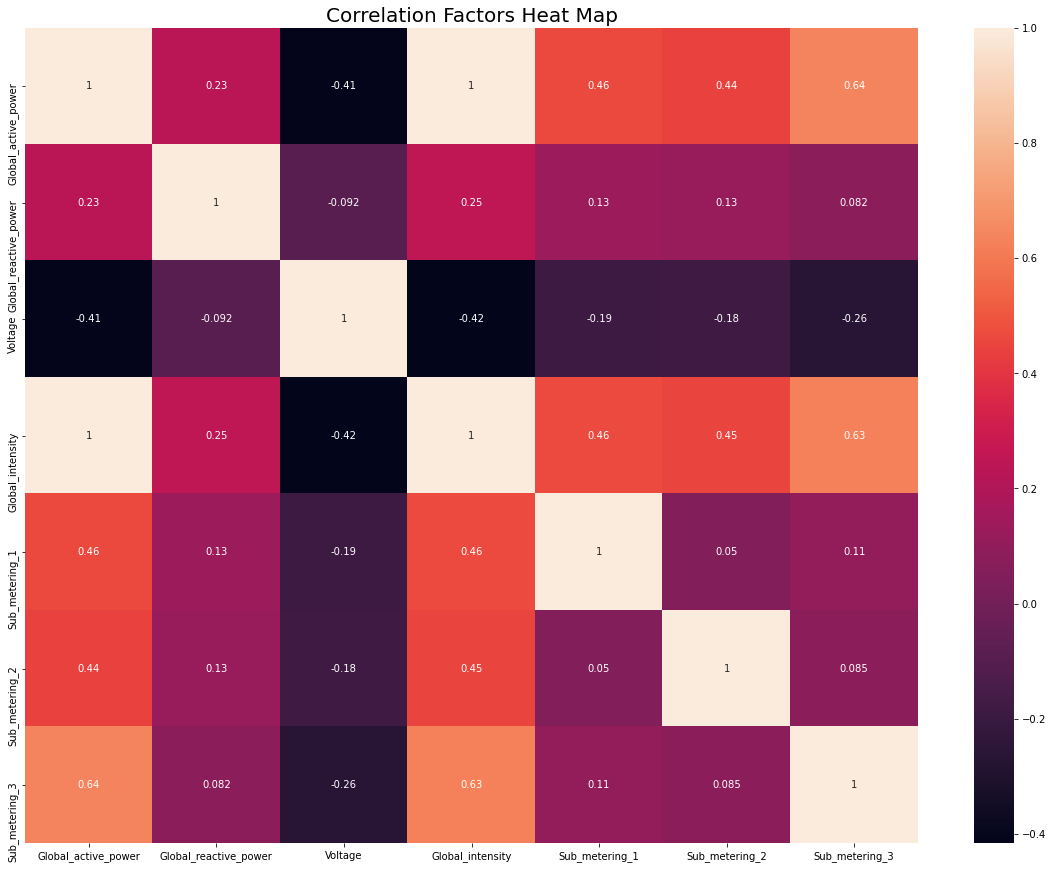

In [17]:
plt.figure(figsize=(20,15))
sns.heatmap(df2.corr(), annot=True).set_title('Correlation Factors Heat Map', color='black', size='20')

In [18]:
from sklearn.preprocessing import StandardScaler
sc_dfa = StandardScaler()
df_std = sc_dfa.fit_transform(df2)

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

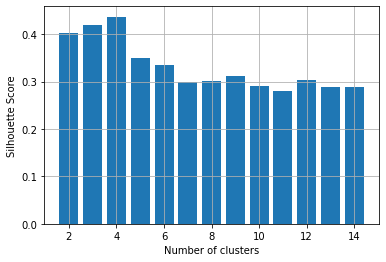

In [20]:
from sklearn.metrics import silhouette_score
silhouette_scores = [] 

for n_cluster in range(2,15):
    silhouette_scores.append( 
        silhouette_score(df_std, KMeans(n_clusters = n_cluster).fit_predict(df_std))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.grid()
plt.show() 

In [21]:
# K-Means Clustering
from sklearn.cluster import KMeans

nclusters = 4 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(df2)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(df2)
y_cluster_kmeans

array([1, 1, 3, ..., 1, 1, 1])

In [22]:
from sklearn import metrics
score = metrics.silhouette_score(df2, y_cluster_kmeans)
score

0.715221748091795

Agglomerative

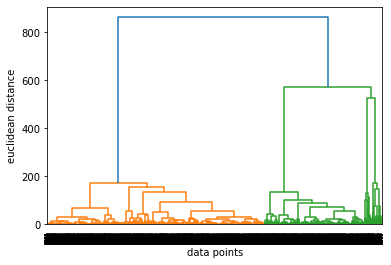

In [23]:
from scipy.cluster.hierarchy import linkage,dendrogram
merg = linkage(df2, method = "ward")
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [24]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = "ward")
cluster = hc.fit_predict(df2)
df2["label"] = cluster

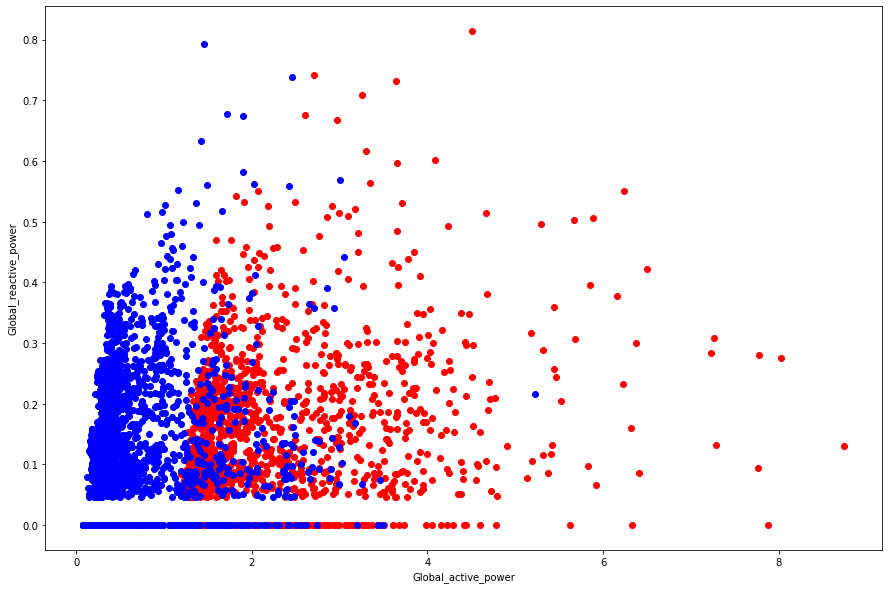

In [25]:
# Data after hierarchical clustering

plt.figure(figsize = (15, 10))
plt.scatter(df2["Global_active_power"][df2.label == 0], df2["Global_reactive_power"][df2.label == 0], color = "red")
plt.scatter(df2["Global_active_power"][df2.label == 1], df2["Global_reactive_power"][df2.label == 1], color = "blue")
plt.xlabel("Global_active_power")
plt.ylabel("Global_reactive_power")
plt.show()